# Análisis de los resultados del experimento MOEA/D MPP 

Análisis de los resultados del experimento MOEA/D MenuPlanning Problem en el clúster El Insurgente del CIMAT.

Las ejecuciones fueron repetidas 30 veces para cada tamaño de problema evaluado: 20, 40 y 60 días.
Asimismo, los resultados obtenidos por el Memético para el artículo del CEC 2019 fueron evaluados con METCO para comprobar la factibilidad de cada solución presente en los ficheros de resultados y además calcular cual sería el "nivel de repetición" de cada solución si se hubiera tenido en cuenta a la hora de ejecutar el Memético.

In [1]:
# Datasets 
mono_20_df_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Mono-objective_20-Days.csv'
mono_40_df_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Mono-objective_40-Days.csv'
mono_60_df_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Mono-objective_60-Days.csv'
multi_20_df_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Multi-objective_Insurgente_20-Days.csv'
multi_40_df_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Multi-objective_Insurgente_40-Days.csv'
multi_60_df_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Multi-objective_Insurgente_60-Days.csv'
multi_60_df_10_hours_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/datasets/Multi-objective_Insurgente_60-Days_10-hours.csv'

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("darkgrid")

%matplotlib inline

In [3]:
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
params =  {
    'axes.labelsize': 22,
    'axes.titlesize': 22
}
plt.rcParams.update(params)
sns.set(font_scale=1.5)  # crazy big


## Boxplots

In [4]:
def compare_boxplots(dataset, title, figure_name):
    figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    figure.suptitle(title)
    sns.boxplot(data = dataset, x = 'Algorithm', y = 'Cost', ax=ax1)
    sns.boxplot(data = dataset, x = 'Algorithm', y = 'Repetition', ax=ax2)
    plt.tight_layout()
    plt.savefig(figure_name)
    plt.show()


In [5]:
# Datos del Memetic en el CEC
mono_20_df = pd.read_csv(mono_20_df_path)
mono_40_df = pd.read_csv(mono_40_df_path)
mono_60_df = pd.read_csv(mono_60_df_path)

mono_20_df.head()

,Algorithm,Cost,Repetition
0,MA,20.2646,319.772
1,MA,20.2646,341.179
2,MA,20.2646,336.936
3,MA,20.2646,346.845
4,MA,20.2646,346.418


In [6]:
# Datos del MOEA/D
multi_20_df = pd.read_csv(multi_20_df_path)
multi_40_df = pd.read_csv(multi_40_df_path)
multi_60_df = pd.read_csv(multi_60_df_path)
multi_60_10h_df = pd.read_csv(multi_60_df_10_hours_path)

multi_20_df.head()

,Algorithm,Cost,Repetition
0,ILS-MOEA/D,20.304659,268.383333
1,ILS-MOEA/D,20.304659,271.618887
2,ILS-MOEA/D,20.304659,271.207631
3,ILS-MOEA/D,20.304659,265.544789
4,ILS-MOEA/D,20.304659,272.344789


### Boxplot para 20 Días

In [7]:
mpp_20_complete = pd.concat([mono_20_df, multi_20_df])
mpp_20_complete.head()

,Algorithm,Cost,Repetition
0,MA,20.2646,319.772
1,MA,20.2646,341.179
2,MA,20.2646,336.936
3,MA,20.2646,346.845
4,MA,20.2646,346.418


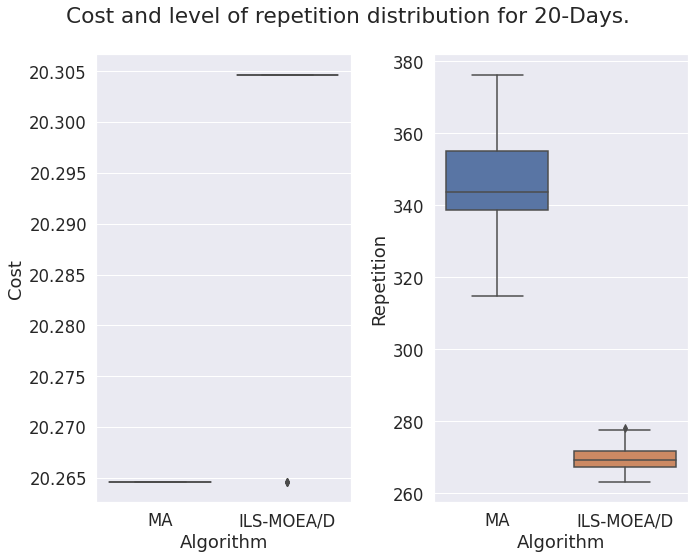

In [8]:
compare_boxplots(mpp_20_complete, 'Cost and level of repetition distribution for 20-Days.', 'boxplots_20_days.png')

### Boxplot para 40 Días

In [9]:
mpp_40_complete = pd.concat([mono_40_df, multi_40_df])
mpp_40_complete.head()

,Algorithm,Cost,Repetition
0,MA,40.0671,833.163
1,MA,40.0671,864.519
2,MA,40.0383,780.201
3,MA,40.0383,769.956
4,MA,40.0671,809.600


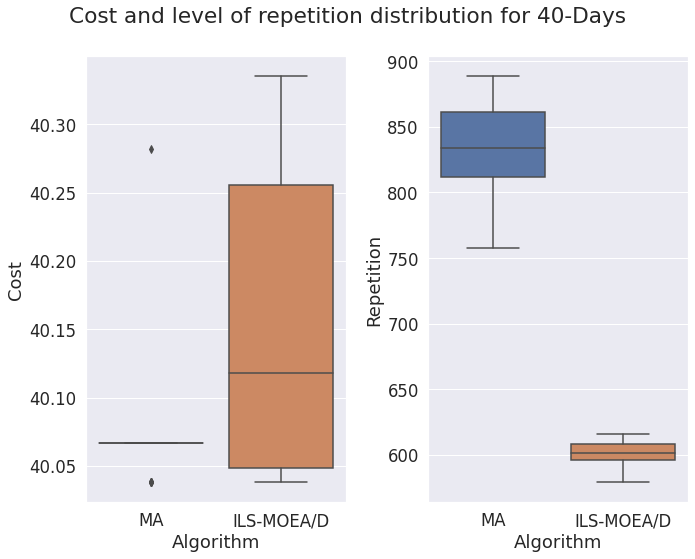

In [10]:
compare_boxplots(mpp_40_complete, 'Cost and level of repetition distribution for 40-Days', 'boxplots_40_days.png')

### Boxplot para 60 Días

In [11]:
mpp_60_complete = pd.concat([mono_60_df, multi_60_df])
mpp_60_complete.head()

,Algorithm,Cost,Repetition
0,MA,59.7212,1147.39
1,MA,59.7212,1210.57
2,MA,59.7212,1256.40
3,MA,59.7212,1265.74
4,MA,59.7212,1267.16


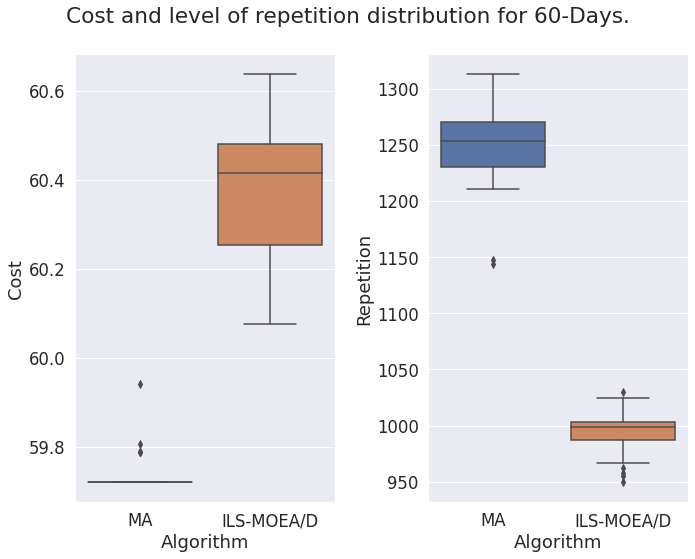

In [12]:
compare_boxplots(mpp_60_complete, 'Cost and level of repetition distribution for 60-Days.', 'box_plots_60_days.png')

## HV Evolution

In [13]:
# Path
evo_20_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/20-Days/evolution/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_Evals_3600_NumSubProblems_15_NeighSize_5_pm_0.0_pc_1.0_MenuPlanning_20_days.avgHV.evolution'
evo_40_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/40-Days/evolution/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_Evals_9000_NumSubProblems_15_NeighSize_5_pm_0.0_pc_1.0_MenuPlanning_40_days.avgHV.evolution'
evo_60_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/60-Days/evolution/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_Evals_18000_NumSubProblems_15_NeighSize_5_pm_0.0_pc_1.0_MenuPlanning_60_days.avgHV.evolution'

best_evo_20_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/20-Days/evolution/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_Evals_3600_NumSubProblems_15_NeighSize_5_pm_0.0_pc_1.0_MenuPlanning_20_days.bestAvgHV.evolution'
best_evo_40_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/40-Days/evolution/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_Evals_9000_NumSubProblems_15_NeighSize_5_pm_0.0_pc_1.0_MenuPlanning_40_days.bestAvgHV.evolution'
best_evo_60_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/60-Days/evolution/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_Evals_18000_NumSubProblems_15_NeighSize_5_pm_0.0_pc_1.0_MenuPlanning_60_days.bestAvgHV.evolution'


In [14]:
evo_20_df = pd.read_csv(evo_20_path, names = ['Checkpoint', 'Av. HV'], 
                        delimiter = ' ')
evo_40_df = pd.read_csv(evo_40_path, names = ['Checkpoint', 'Av. HV'], 
                        delimiter = ' ')
evo_60_df = pd.read_csv(evo_60_path, names = ['Checkpoint', 'Av. HV'], 
                        delimiter = ' ')

best_evo_20_df = pd.read_csv(best_evo_20_path, names = ['Checkpoint', 'Av. HV'], 
                             delimiter = ' ')
best_evo_40_df = pd.read_csv(best_evo_40_path, names = ['Checkpoint', 'Av. HV'], 
                             delimiter = ' ')
best_evo_60_df = pd.read_csv(best_evo_60_path, names = ['Checkpoint', 'Av. HV'], 
                             delimiter = ' ')

In [15]:
evo_20_df.head()

,Checkpoint,Av. HV
0,180,0.652310
1,360,0.735282
2,540,0.789031
3,720,0.815989
4,900,0.831478


In [16]:
def generate_evolution(dataset, title = '', x_arg = 'Checkpoint', 
                       y_arg = 'Av. HV', figure_name=''):
    plt.figure(figsize=(10, 8))
    sns.lineplot(data = dataset, x = x_arg , y = y_arg)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(figure_name)
    plt.show()

def compare_evolution(df_1, df_2, title = '', x_arg = 'Checkpoint', 
                      y_arg = 'Av. HV', label_1 = '', label_2 = '', figure_name='', share_axis = False):

    plt.figure(figsize=(10, 8))
    if share_axis:
        plt.title(title)
        plt.plot(df_1[x_arg], df_1[y_arg], color = 'b', label = label_1)
        plt.plot(df_2[x_arg], df_2[y_arg], color = 'r', label  = label_2)
        plt.ylabel(y_arg)
        plt.xlabel(x_arg)
        plt.legend()
    else:
        figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
        figure.suptitle(title)
        ax1.plot(df_1[x_arg], df_1[y_arg], color = 'b', label = label_1)
        ax1.legend(loc='upper right')
        ax1.set_ylabel(y_arg)
        ax1.set_xlabel(x_arg)
        ax2.plot(df_2[x_arg], df_2[y_arg], color = 'r', label  = label_2)
        ax2.legend(loc='upper right')
        ax2.set_ylabel(y_arg)
        ax2.set_xlabel(x_arg)
        
    plt.tight_layout()
    plt.savefig(figure_name)
    plt.show()


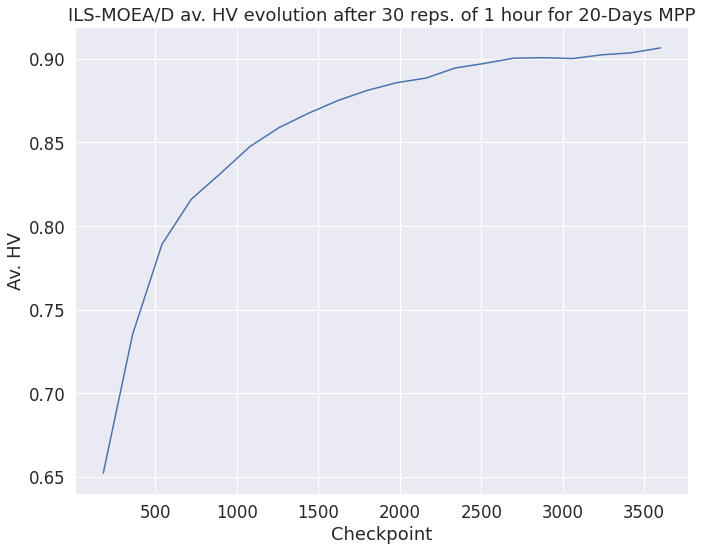

In [55]:
generate_evolution(evo_20_df, title='ILS-MOEA/D av. HV evolution after 30 reps. of 1 hour for 20-Days MPP', 
                                figure_name='MOEAD_20-days_avg-evo.png')

<Figure size 720x576 with 0 Axes>

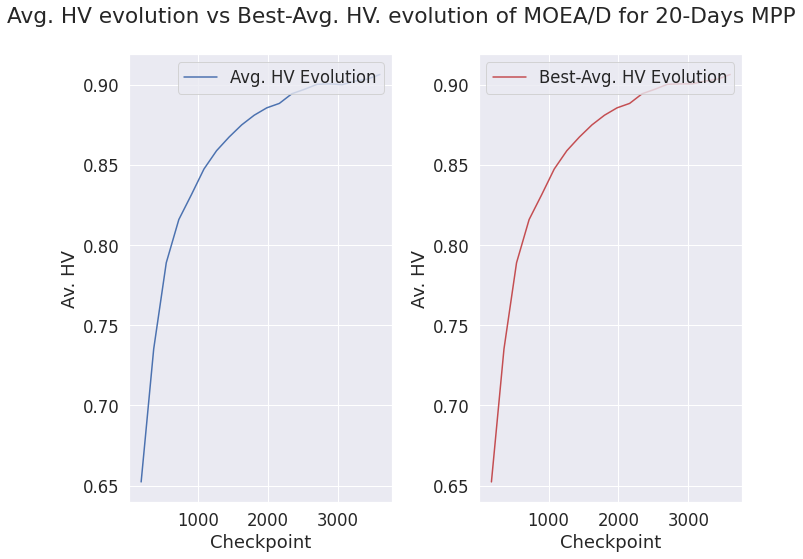

In [18]:
compare_evolution(evo_20_df, best_evo_20_df, 
                  title = 'Avg. HV evolution vs Best-Avg. HV. evolution of MOEA/D for 20-Days MPP', 
                  x_arg = 'Checkpoint', y_arg = 'Av. HV',
                  label_1 = 'Avg. HV Evolution', label_2 = 'Best-Avg. HV Evolution',
                  figure_name='MOEAD_20-days_avg_vs_best-avg_evolution.png')

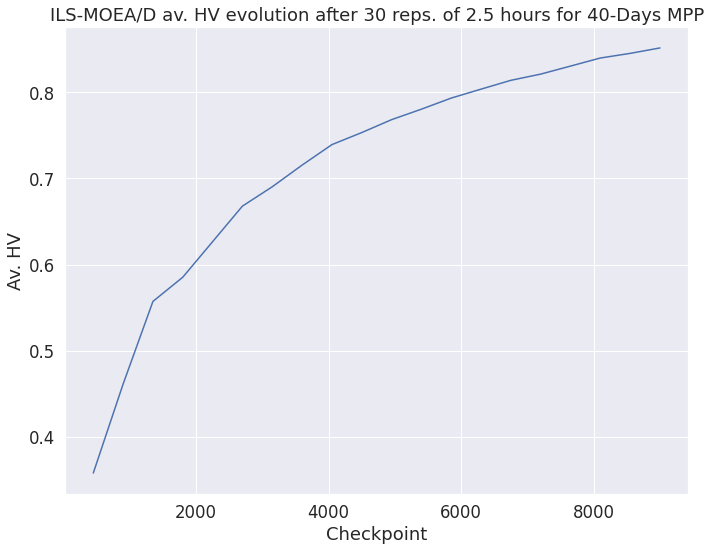

In [19]:
generate_evolution(evo_40_df, title='ILS-MOEA/D av. HV evolution after 30 reps. of 2.5 hours for 40-Days MPP',
                                figure_name='MOEAD_40-days_avg-evo.png')

<Figure size 720x576 with 0 Axes>

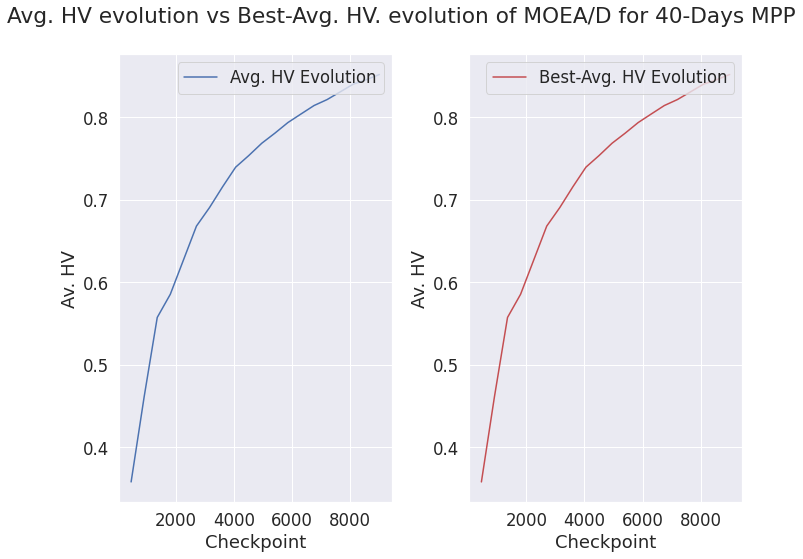

In [20]:
compare_evolution(evo_40_df, best_evo_40_df, 
                  title = 'Avg. HV evolution vs Best-Avg. HV. evolution of MOEA/D for 40-Days MPP', 
                  x_arg = 'Checkpoint', y_arg = 'Av. HV',
                  label_1 = 'Avg. HV Evolution', label_2 = 'Best-Avg. HV Evolution',
                  figure_name='MOEAD_40-days_avg_vs_best-avg_evolution.png')

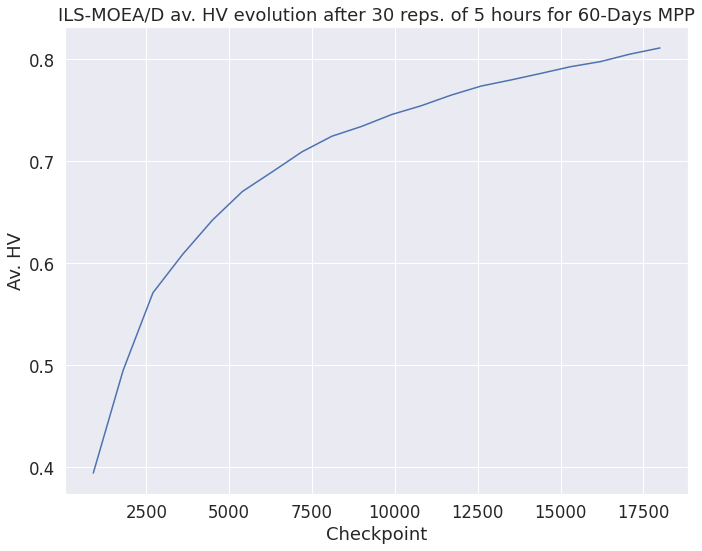

In [21]:
generate_evolution(evo_60_df, title='ILS-MOEA/D av. HV evolution after 30 reps. of 5 hours for 60-Days MPP',
                                 figure_name='MOEAD_60-days_avg-evo.png')

<Figure size 720x576 with 0 Axes>

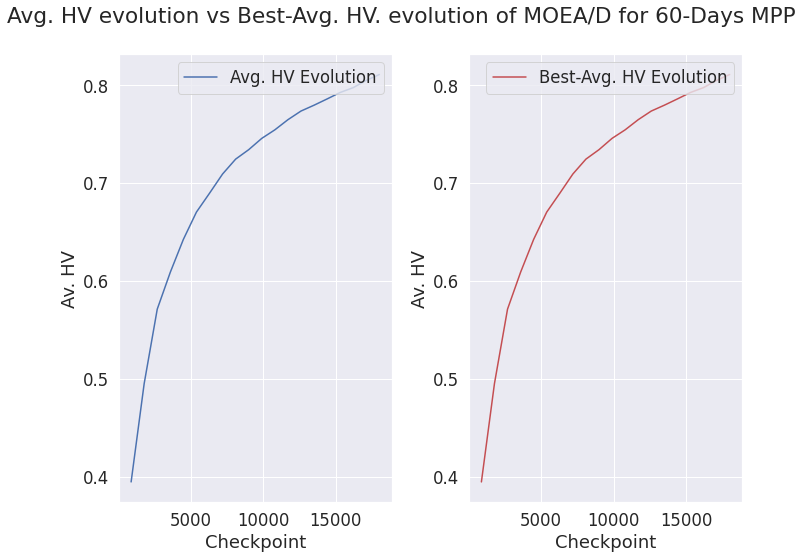

In [22]:
compare_evolution(evo_60_df, best_evo_60_df, 
                  title = 'Avg. HV evolution vs Best-Avg. HV. evolution of MOEA/D for 60-Days MPP', 
                  x_arg = 'Checkpoint', y_arg = 'Av. HV',
                  label_1 = 'Avg. HV Evolution', label_2 = 'Best-Avg. HV Evolution',
                  figure_name='MOEAD_60-days_avg_vs_best-avg_evolution.png')

## Evolución de la diversidad 

In [23]:
# Path
mono_evo_diver_20_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Mono-objective-results-CEC/20-Days/Mono-objective_20-Days_Mean_Distance_Neighbour.evolution'
mono_evo_diver_40_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Mono-objective-results-CEC/40-Days/Mono-objective_40-Days_Mean_Distance_Neighbour.evolution'
mono_evo_diver_60_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Mono-objective-results-CEC/60-Days/Mono-objective_60-Days_Mean_Distance_Neighbour.evolution'

evo_diver_20_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/20-Days/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_20_Days_Mean_Distance_Neighbour.evolution'
evo_diver_40_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/40-Days/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_40_Days_Mean_Distance_Neighbour.evolution'
evo_diver_60_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/60-Days/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_60_Days_Mean_Distance_Neighbour.evolution'


In [24]:
evo_diver_20_df = pd.read_csv(evo_diver_20_path, 
                              names = ['Checkpoint', 'Mean Diversity'], delimiter = ',')
evo_diver_40_df = pd.read_csv(evo_diver_40_path, 
                              names = ['Checkpoint', 'Mean Diversity'], delimiter = ',')
evo_diver_60_df = pd.read_csv(evo_diver_60_path, 
                              names = ['Checkpoint', 'Mean Diversity'], delimiter = ',')

moev_div_20_df = pd.read_csv(mono_evo_diver_20_path, 
                             names = ['Checkpoint', 'Mean Diversity'], delimiter = ',')
moev_div_40_df = pd.read_csv(mono_evo_diver_40_path, 
                             names = ['Checkpoint', 'Mean Diversity'], delimiter = ',')
moev_div_60_df = pd.read_csv(mono_evo_diver_60_path, 
                             names = ['Checkpoint', 'Mean Diversity'], delimiter = ',')

evo_diver_20_df.head()

,Checkpoint,Mean Diversity
0,180,4.531892
1,360,3.980325
2,540,3.060546
3,720,3.072542
4,900,2.945420


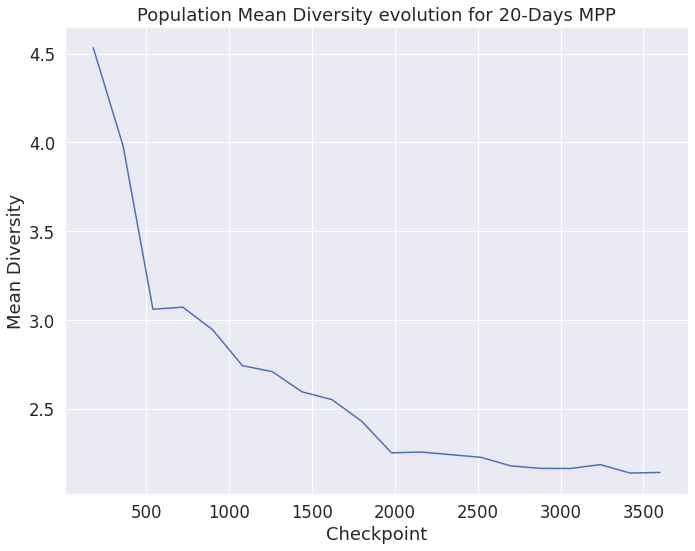

In [25]:
generate_evolution(evo_diver_20_df, y_arg = 'Mean Diversity', 
                   title='Population Mean Diversity evolution for 20-Days MPP',
                    figure_name='MOEAD_20-days_diversity-evo.png')

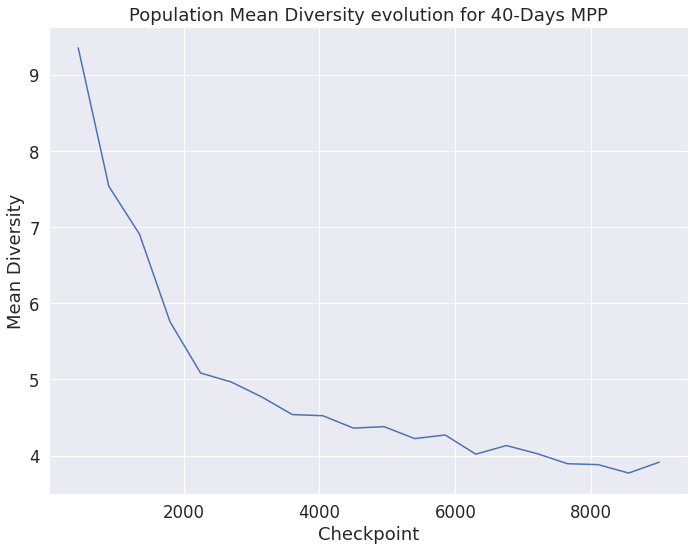

In [26]:
generate_evolution(evo_diver_40_df, y_arg = 'Mean Diversity', 
                   title='Population Mean Diversity evolution for 40-Days MPP',
                    figure_name='MOEAD_40-days_diversity-evo.png')

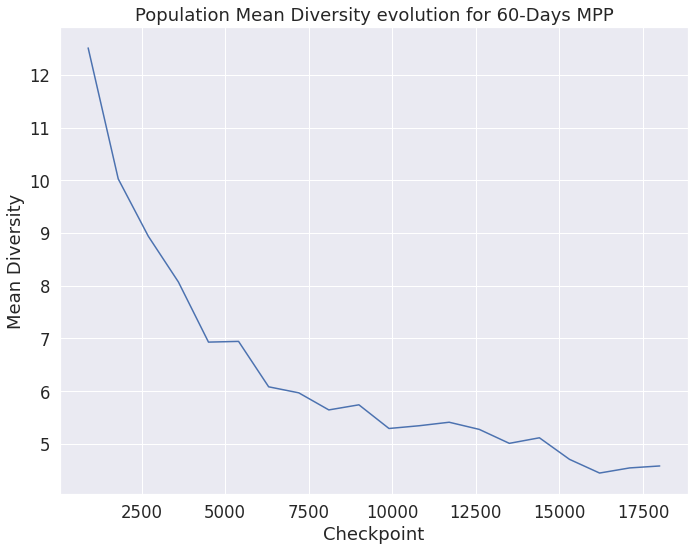

In [27]:
generate_evolution(evo_diver_60_df, y_arg = 'Mean Diversity', 
                   title='Population Mean Diversity evolution for 60-Days MPP',
                    figure_name='MOEAD_60-days_diversity-evo.png')

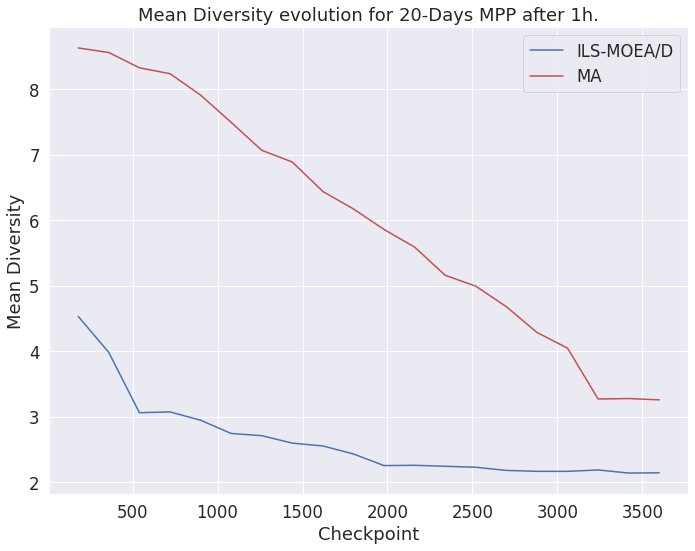

In [28]:
compare_evolution(evo_diver_20_df, moev_div_20_df, 
                  title = 'Mean Diversity evolution for 20-Days MPP after 1h.', 
                  x_arg = 'Checkpoint', y_arg = 'Mean Diversity', label_1 = 'ILS-MOEA/D', label_2 = 'MA',
                  figure_name='MOEAD_vs_Memetic_20-days_diversity-evo.png', share_axis=True)

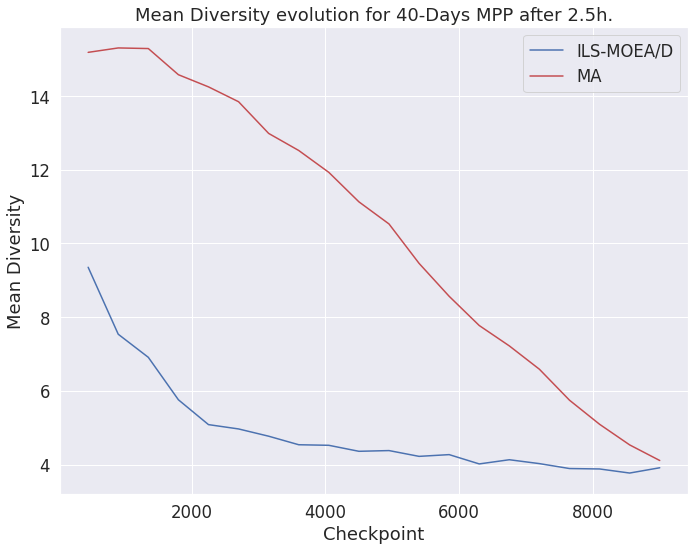

In [29]:
compare_evolution(evo_diver_40_df, moev_div_40_df, 
                  title = 'Mean Diversity evolution for 40-Days MPP after 2.5h.', 
                  x_arg = 'Checkpoint', y_arg = 'Mean Diversity', label_1 = 'ILS-MOEA/D', label_2 = 'MA',
                  figure_name='MOEAD_vs_Memetic_40-days_diversity-evo.png', share_axis=True)

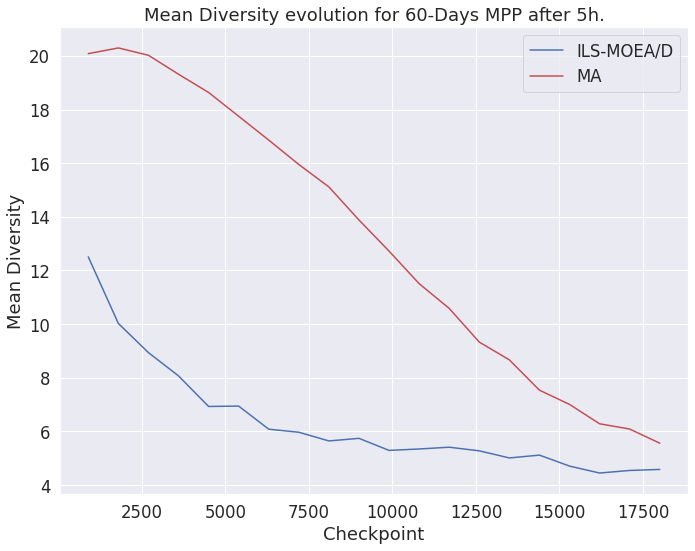

In [30]:
compare_evolution(evo_diver_60_df, moev_div_60_df, 
                  title = 'Mean Diversity evolution for 60-Days MPP after 5h.', 
                  x_arg = 'Checkpoint', y_arg = 'Mean Diversity', label_1 = 'ILS-MOEA/D', label_2 = 'MA',
                  figure_name='MOEAD_vs_Memetic_60-days_diversity-evo.png', share_axis=True)

## Comparación de frentes

In [31]:
mono_front_20_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Mono-objective-results-CEC/RMDDC_PairBasedCrossover_20Days_0.5_1.final_front'
mono_front_40_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Mono-objective-results-CEC/RMDDC_PairBasedCrossover_40Days_0.5_1.final_front'
mono_front_60_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Mono-objective-results-CEC/RMDDC_PairBasedCrossover_60Days_0.5_1.final_front'

multi_front_20_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/20-Days/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_20_Days_sampleFront.front'
multi_front_40_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/40-Days/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_40_Days_sampleFront.front'
multi_front_60_path = '/home/amarrero/Proyectos/MenuPlanning_MOEAD_Mathematics_2020/results/Multi-objective-results-Mathematics/60-Days/Insurgente_Sequential_MenuPlanning_Mathematics_MainStudy_MOEAD_MPP_60_Days_sampleFront.front'

In [32]:
mono_front_20_df = pd.read_csv(mono_front_20_path, sep = ' ', header = None)
mono_front_40_df = pd.read_csv(mono_front_40_path, sep = ' ', header = None)
mono_front_60_df = pd.read_csv(mono_front_60_path, sep = ' ', header = None)

multi_front_20_df = pd.read_csv(multi_front_20_path, sep = ' ', header = None)
multi_front_40_df = pd.read_csv(multi_front_40_path, sep = ' ', header = None)
multi_front_60_df = pd.read_csv(multi_front_60_path, sep = ' ', header = None)


In [33]:
mono_front_20_df.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,13,6,3,12,16,2,0,2,7,0,...,2,7,17,9,2,17,18,2,20.2646,447.727
1,13,6,3,12,16,2,0,2,7,0,...,2,7,17,9,2,17,9,2,20.2646,453.183
2,1,2,11,12,16,2,12,16,2,13,...,18,2,1,2,7,0,2,7,20.3047,368.400
3,13,6,3,12,16,2,0,2,7,0,...,9,2,1,2,11,17,9,2,20.3047,342.641
4,13,6,3,12,16,2,0,2,7,0,...,2,7,17,18,2,17,18,2,20.2646,456.616


In [34]:
mono_front_20_df = mono_front_20_df.iloc[:, [-2, -1]]
mono_front_20_df.head()

,60,61
0,20.2646,447.727
1,20.2646,453.183
2,20.3047,368.400
3,20.3047,342.641
4,20.2646,456.616


In [35]:
mono_front_40_df = mono_front_40_df.iloc[:, [-2, -1]]
mono_front_60_df = mono_front_60_df.iloc[:, [-2, -1]]

multi_front_20_df = multi_front_20_df.iloc[:, [-2, -1]]
multi_front_40_df = multi_front_40_df.iloc[:, [-2, -1]]
multi_front_60_df = multi_front_60_df.iloc[:, [-2, -1]]

In [36]:
def rename_cols(dataset):
    dataset.columns = ['Cost', 'Repetition']
    return dataset

In [37]:
mono_front_20_df = rename_cols(mono_front_20_df)
mono_front_40_df = rename_cols(mono_front_40_df)
mono_front_60_df = rename_cols(mono_front_60_df)

multi_front_20_df = rename_cols(multi_front_20_df)
multi_front_40_df = rename_cols(multi_front_40_df)
multi_front_60_df = rename_cols(multi_front_60_df)

In [38]:
def plot_front(dataset, title, label, marker, color, figure_name):
    plt.figure(figsize=(10, 8))
    plt.scatter(dataset['Cost'], dataset['Repetition'], c = color, marker = marker, 
                label = label, s = 100)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.savefig(figure_name)
    plt.show()
    
def compare_fronts(df, mono_x = 0, mono_y = 0, title = '', multi_label = '', mono_label = '',
                   multi_marker = '.', mono_marker = '*', multi_color = 'r',
                   mono_color = 'b', figure_name = ''):
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.scatter(df['Cost'], df['Repetition'], c = multi_color, 
                marker = multi_marker, label = multi_label, s = 200)
    plt.scatter(mono_x, mono_y, c = mono_color, 
                marker = mono_marker, label = mono_label, s = 150)
    plt.legend(loc='upper right')
    plt.xlabel('Cost')
    plt.ylabel('Repetition')
    plt.tight_layout()
    plt.savefig(figure_name)
    plt.show()


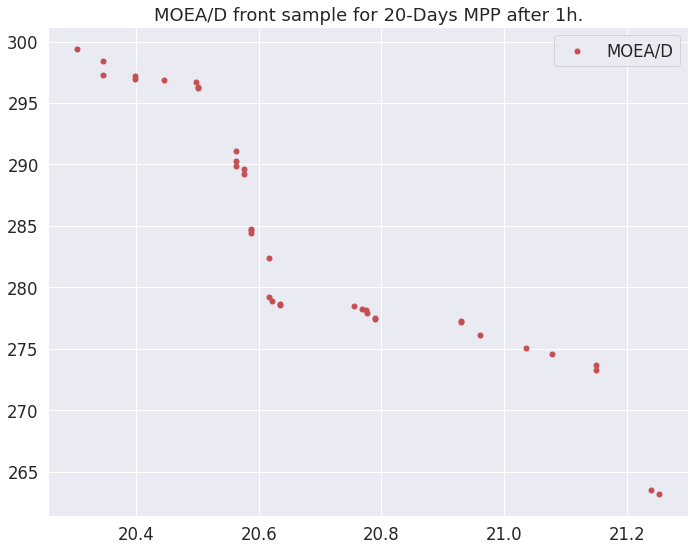

In [39]:
plot_front(multi_front_20_df, 'MOEA/D front sample for 20-Days MPP after 1h.', 
           label='MOEA/D', marker = '.', color = 'r', figure_name='MOEAD_20-Days_front.png')

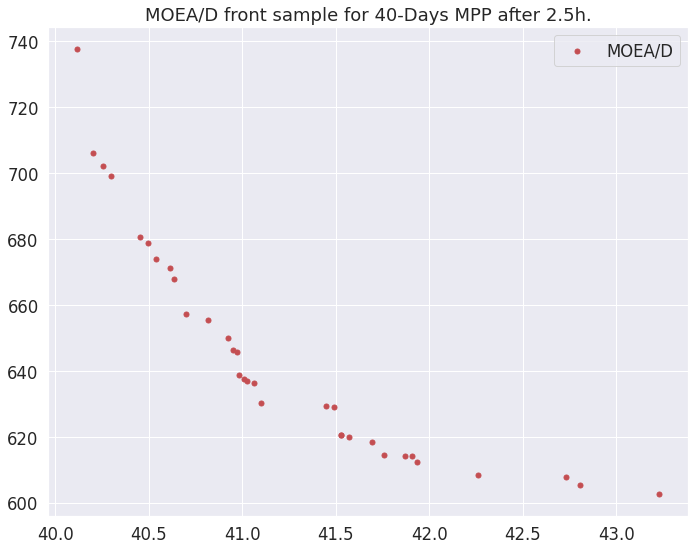

In [40]:
plot_front(multi_front_40_df, 'MOEA/D front sample for 40-Days MPP after 2.5h.', 
           label='MOEA/D', marker = '.', color = 'r',  figure_name='MOEAD_40-Days_front.png')

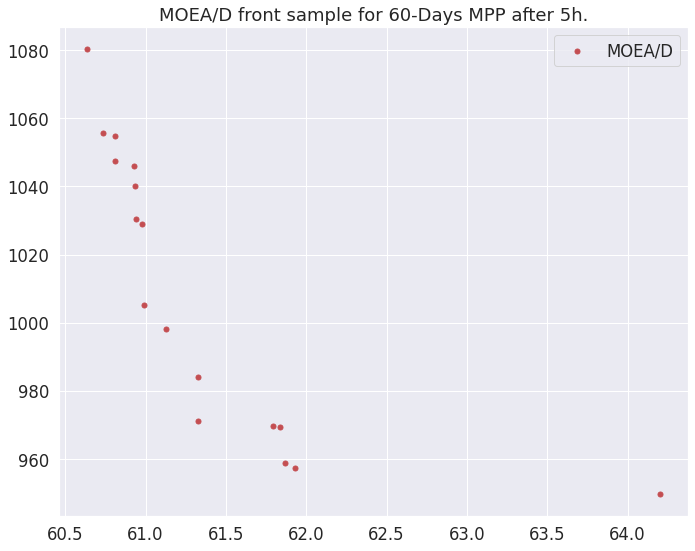

In [41]:
plot_front(multi_front_60_df, 'MOEA/D front sample for 60-Days MPP after 5h.', 
           label='MOEA/D', marker = '.', color = 'r', figure_name='MOEAD_60-Days_front.png')

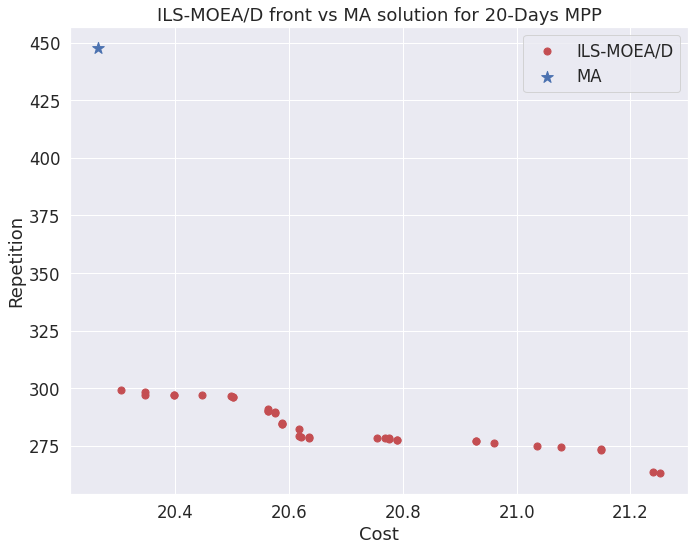

In [42]:
mono_best_cost_20 = 20.2646
mono_best_rep_20 = 447.727

compare_fronts(multi_front_20_df, mono_x = mono_best_cost_20, mono_y = mono_best_rep_20, 
               title='ILS-MOEA/D front vs MA solution for 20-Days MPP', 
               multi_label='ILS-MOEA/D', mono_label = 'MA', figure_name='MOEAD_20-Days_front_vs_Memetic_best.png')


In [43]:
# ¿Mejores resultados para 40 y 60?
print(mono_front_40_df)
print(mono_front_60_df)

      Cost  Repetition
0  40.0383     840.869
1  40.0671     898.240
2  40.5531     858.707
3  40.1484     879.148
4  40.0671     911.686
5  40.3103     826.559
6  40.0671     917.779
7  40.1484     899.698
8  40.1183     802.939
9  40.3103     810.806
      Cost  Repetition
0  59.7212     1290.51
1  59.7212     1283.70
2  60.0092     1283.11
3  59.7212     1294.58
4  60.1259     1301.90
5  60.2022     1360.78
6  61.1287     1302.51
7  59.7212     1296.71
8  60.1572     1270.58


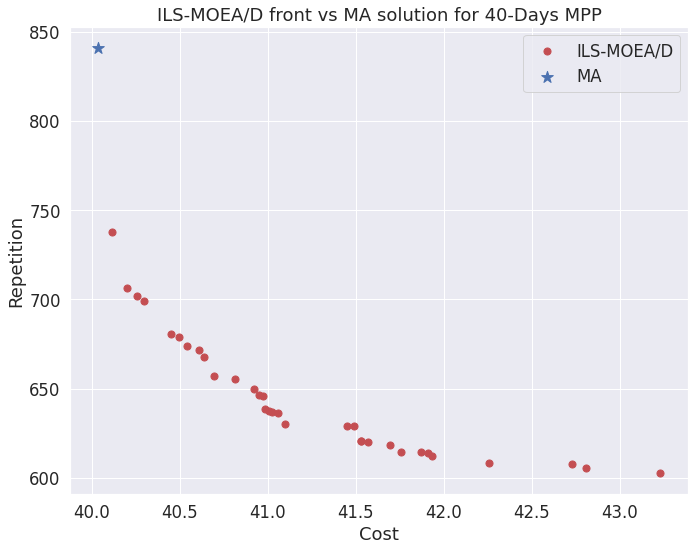

In [44]:
mono_best_cost_40 = 40.0383
mono_best_rep_40 = 840.869

compare_fronts(multi_front_40_df, mono_x = mono_best_cost_40, mono_y = mono_best_rep_40, 
               title='ILS-MOEA/D front vs MA solution for 40-Days MPP',  
               multi_label='ILS-MOEA/D', mono_label = 'MA', figure_name='MOEAD_40-Days_front_vs_Memetic_best.png')


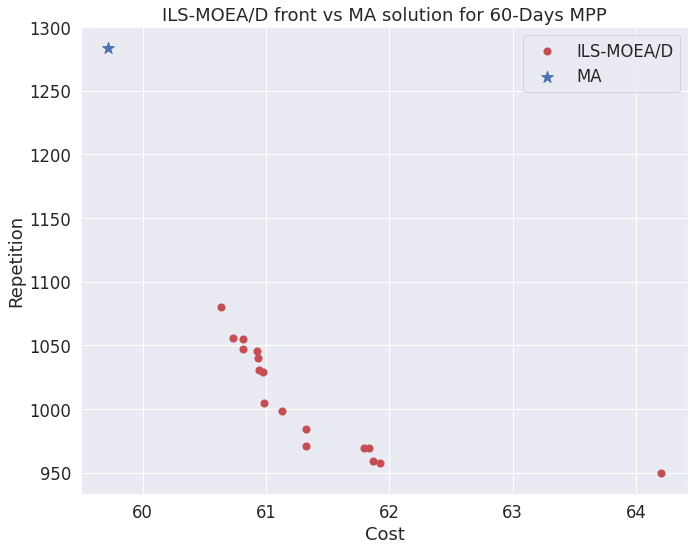

In [45]:
mono_best_cost_60 = 59.7212
mono_best_rep_60 = 1283.70

compare_fronts(multi_front_60_df, mono_x = mono_best_cost_60, mono_y = mono_best_rep_60, 
               title='ILS-MOEA/D front vs MA solution for 60-Days MPP',  
               multi_label='ILS-MOEA/D', mono_label = 'MA', figure_name='MOEAD_60-Days_front_vs_Memetic_best.png')


## Resultados Generales

In [46]:
mpp_20_desc = mpp_20_complete.groupby('Algorithm').describe()
mpp_20_desc

Cost                                                            \
           count       mean           std        min        25%        50%   
Algorithm                                                                    
ILS-MOEA/D  30.0  20.299321  1.384116e-02  20.264626  20.304659  20.304659   
MA          30.0  20.264600  7.226896e-15  20.264600  20.264600  20.264600   

                                 Repetition                         \
                  75%        max      count        mean        std   
Algorithm                                                            
ILS-MOEA/D  20.304659  20.304659       30.0  269.800879   3.695221   
MA          20.264600  20.264600       30.0  346.074800  14.508745   

                                                                       
                   min         25%        50%         75%         max  
Algorithm                                                              
ILS-MOEA/D  263.166522  267.438593  269.19756  271.749052  278.222802  
MA          314.943000  338.785500  343.81300  355.178000  376.298000

In [47]:
# Version en LaTeX para el artículo
print(mpp_20_desc.to_latex(index = False))

\begin{tabular}{rrrrrrrrrrrrrrrr}
\toprule
 Cost & \multicolumn{8}{l}{Repetition} \\
count &       mean &           std &        min &        25\% &        50\% &        75\% &        max &      count &        mean &        std &         min &         25\% &        50\% &         75\% &         max \\
 30.0 &  20.299321 &  1.384116e-02 &  20.264626 &  20.304659 &  20.304659 &  20.304659 &  20.304659 &       30.0 &  269.800879 &   3.695221 &  263.166522 &  267.438593 &  269.19756 &  271.749052 &  278.222802 \\
\midrule
 30.0 &  20.264600 &  7.226896e-15 &  20.264600 &  20.264600 &  20.264600 &  20.264600 &  20.264600 &       30.0 &  346.074800 &  14.508745 &  314.943000 &  338.785500 &  343.81300 &  355.178000 &  376.298000 \\
\bottomrule
\end{tabular}



In [48]:
mpp_40_desc = mpp_40_complete.groupby('Algorithm').describe()
mpp_40_desc

Cost                                                        \
           count       mean       std        min        25%        50%   
Algorithm                                                                
ILS-MOEA/D  30.0  40.153351  0.102308  40.038337  40.048837  40.118338   
MA          30.0  40.067530  0.042268  40.038300  40.067100  40.067100   

                                 Repetition                         \
                  75%        max      count        mean        std   
Algorithm                                                            
ILS-MOEA/D  40.255825  40.335003       30.0  601.309159   8.616925   
MA          40.067100  40.281600       30.0  833.067800  33.055332   

                                                                        
                   min         25%         50%         75%         max  
Algorithm                                                               
ILS-MOEA/D  579.400624  596.304936  601.860788  608.046807  615.871078  
MA          757.831000  811.978000  833.789500  861.698000  888.489000

In [49]:
# Version en LaTeX para el artículo
print(mpp_40_desc.to_latex(index = False))

\begin{tabular}{rrrrrrrrrrrrrrrr}
\toprule
 Cost & \multicolumn{8}{l}{Repetition} \\
count &       mean &       std &        min &        25\% &        50\% &        75\% &        max &      count &        mean &        std &         min &         25\% &         50\% &         75\% &         max \\
 30.0 &  40.153351 &  0.102308 &  40.038337 &  40.048837 &  40.118338 &  40.255825 &  40.335003 &       30.0 &  601.309159 &   8.616925 &  579.400624 &  596.304936 &  601.860788 &  608.046807 &  615.871078 \\
\midrule
 30.0 &  40.067530 &  0.042268 &  40.038300 &  40.067100 &  40.067100 &  40.067100 &  40.281600 &       30.0 &  833.067800 &  33.055332 &  757.831000 &  811.978000 &  833.789500 &  861.698000 &  888.489000 \\
\bottomrule
\end{tabular}



In [50]:
mpp_60_desc = mpp_60_complete.groupby('Algorithm').describe()
mpp_60_desc

Cost                                                        \
           count       mean       std        min        25%        50%   
Algorithm                                                                
ILS-MOEA/D  30.0  60.368492  0.154211  60.076898  60.254637  60.415694   
MA          30.0  59.738030  0.045635  59.721200  59.721200  59.721200   

                                 Repetition                          \
                  75%        max      count         mean        std   
Algorithm                                                             
ILS-MOEA/D  60.480413  60.636847       30.0   994.252884  19.886383   
MA          59.721200  59.940900       30.0  1247.270333  36.995833   

                                                                             
                    min          25%          50%          75%          max  
Algorithm                                                                    
ILS-MOEA/D   949.750062   987.079731   998.604306  1003.470576  1029.680253  
MA          1143.820000  1230.040000  1253.470000  1270.430000  1312.760000

In [51]:
# Version en LaTeX para el artículo
print(mpp_60_desc.to_latex(index = False))

\begin{tabular}{rrrrrrrrrrrrrrrr}
\toprule
 Cost & \multicolumn{8}{l}{Repetition} \\
count &       mean &       std &        min &        25\% &        50\% &        75\% &        max &      count &         mean &        std &          min &          25\% &          50\% &          75\% &          max \\
 30.0 &  60.368492 &  0.154211 &  60.076898 &  60.254637 &  60.415694 &  60.480413 &  60.636847 &       30.0 &   994.252884 &  19.886383 &   949.750062 &   987.079731 &   998.604306 &  1003.470576 &  1029.680253 \\
\midrule
 30.0 &  59.738030 &  0.045635 &  59.721200 &  59.721200 &  59.721200 &  59.721200 &  59.940900 &       30.0 &  1247.270333 &  36.995833 &  1143.820000 &  1230.040000 &  1253.470000 &  1270.430000 &  1312.760000 \\
\bottomrule
\end{tabular}



In [52]:
multi_60_10_desc = multi_60_10h_df.describe()

In [53]:
multi_60_10_desc

,Cost,Repetition
count,30.000000,30.000000
mean,60.203779,965.629453
std,0.159079,32.295287
min,59.741781,904.664868
25%,60.087398,943.594309
50%,60.170564,980.520498
75%,60.295970,985.826220
max,60.480413,1008.097106


In [54]:
print(multi_60_10_desc.to_latex())

\begin{tabular}{lrr}
\toprule
{} &       Cost &   Repetition \\
\midrule
count &  30.000000 &    30.000000 \\
mean  &  60.203779 &   965.629453 \\
std   &   0.159079 &    32.295287 \\
min   &  59.741781 &   904.664868 \\
25\%   &  60.087398 &   943.594309 \\
50\%   &  60.170564 &   980.520498 \\
75\%   &  60.295970 &   985.826220 \\
max   &  60.480413 &  1008.097106 \\
\bottomrule
\end{tabular}

